In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import plotly.express as px
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Define a function get_image_dimensions that loads an image and returns its height and width
def get_image_dimensions(image_path):
    img = image.load_img(image_path)
    return img.height, img.width

In [3]:
#A DataFrame named df to store information about image files. It walks through two directories, one for fire images and another for non-fire images
df = pd.DataFrame(columns = ['path','labels'])
for dirname, _, filenames in os.walk(r"C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dataset\fire_images"):
    for filename in filenames:
        height, width = get_image_dimensions(os.path.join(dirname, filename))
        df = df.append(pd.DataFrame([[os.path.join(dirname,filename),'fire',height,width]],columns=['path','labels','height','width']))
for dirname, _, filenames in os.walk(r"C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dataset\non_fire_images"):
    for filename in filenames:
        height, width = get_image_dimensions(os.path.join(dirname, filename))
        df = df.append(pd.DataFrame([[os.path.join(dirname,filename),'non-fire',height,width]],columns = ['path','labels','height','width']))
#here we randomize images and sample them
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

path    labels  height   width
0  C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dat...      fire  3354.0  5204.0
1  C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dat...      fire   405.0   720.0
2  C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dat...      fire   619.0  1100.0
3  C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dat...      fire   512.0   768.0
4  C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dat...      fire   315.0   560.0
5  C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dat...      fire   720.0  1200.0
6  C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dat...      fire   450.0   878.0
7  C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dat...      fire   305.0   458.0
8  C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dat...      fire   485.0   674.0
9  C:\Users\Abdo Tarek\Downloads\Fire DS\fire_dat...  non-fire  1000.0  1600.0

In [4]:
#scatter plot showing the distribution of fire and non-fire labels
fig = px.scatter(data_frame = df,x=df.index,y='labels',color='labels',title='Distribution of fire and non-fire after being randomized')
fig.update_traces(marker_size=2)

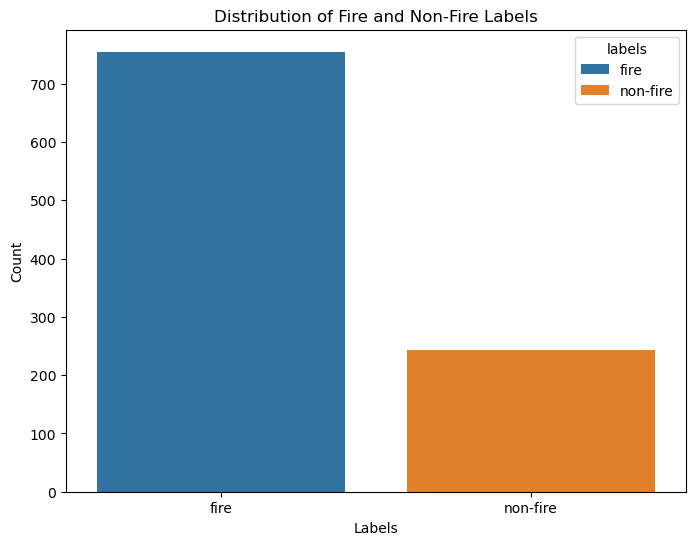

In [5]:
#countplot using Seaborn to visualize the distribution of fire and non-fire labels
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='labels', hue = 'labels', dodge = False)
plt.title('Distribution of Fire and Non-Fire Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [6]:
#a pie chart representing the proportion of fire and non-fire labels
labels_count = df['labels'].value_counts()
fig = px.pie(labels_count, values=labels_count.values, names=labels_count.index, title='Proportion of Fire and Non-Fire Labels')
fig.show()

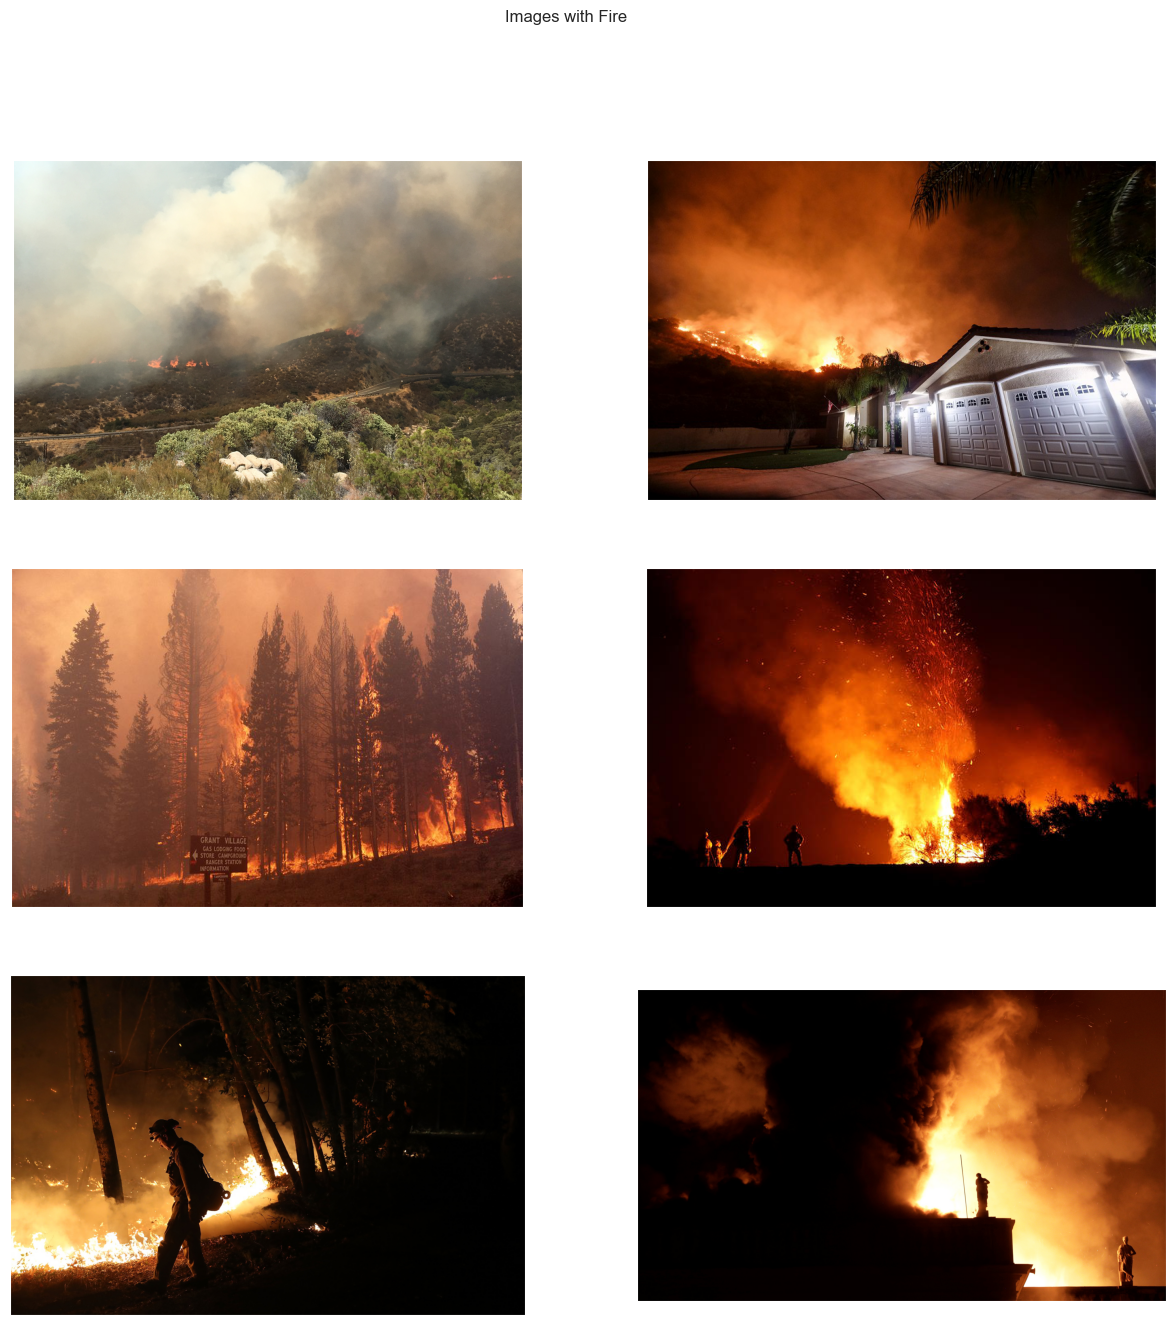

In [7]:
#selects images with the label "fire" and sets up a subplot for displaying 6 images, and displays these images
label = 'fire' #label for images with fire
data = df[df['labels'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

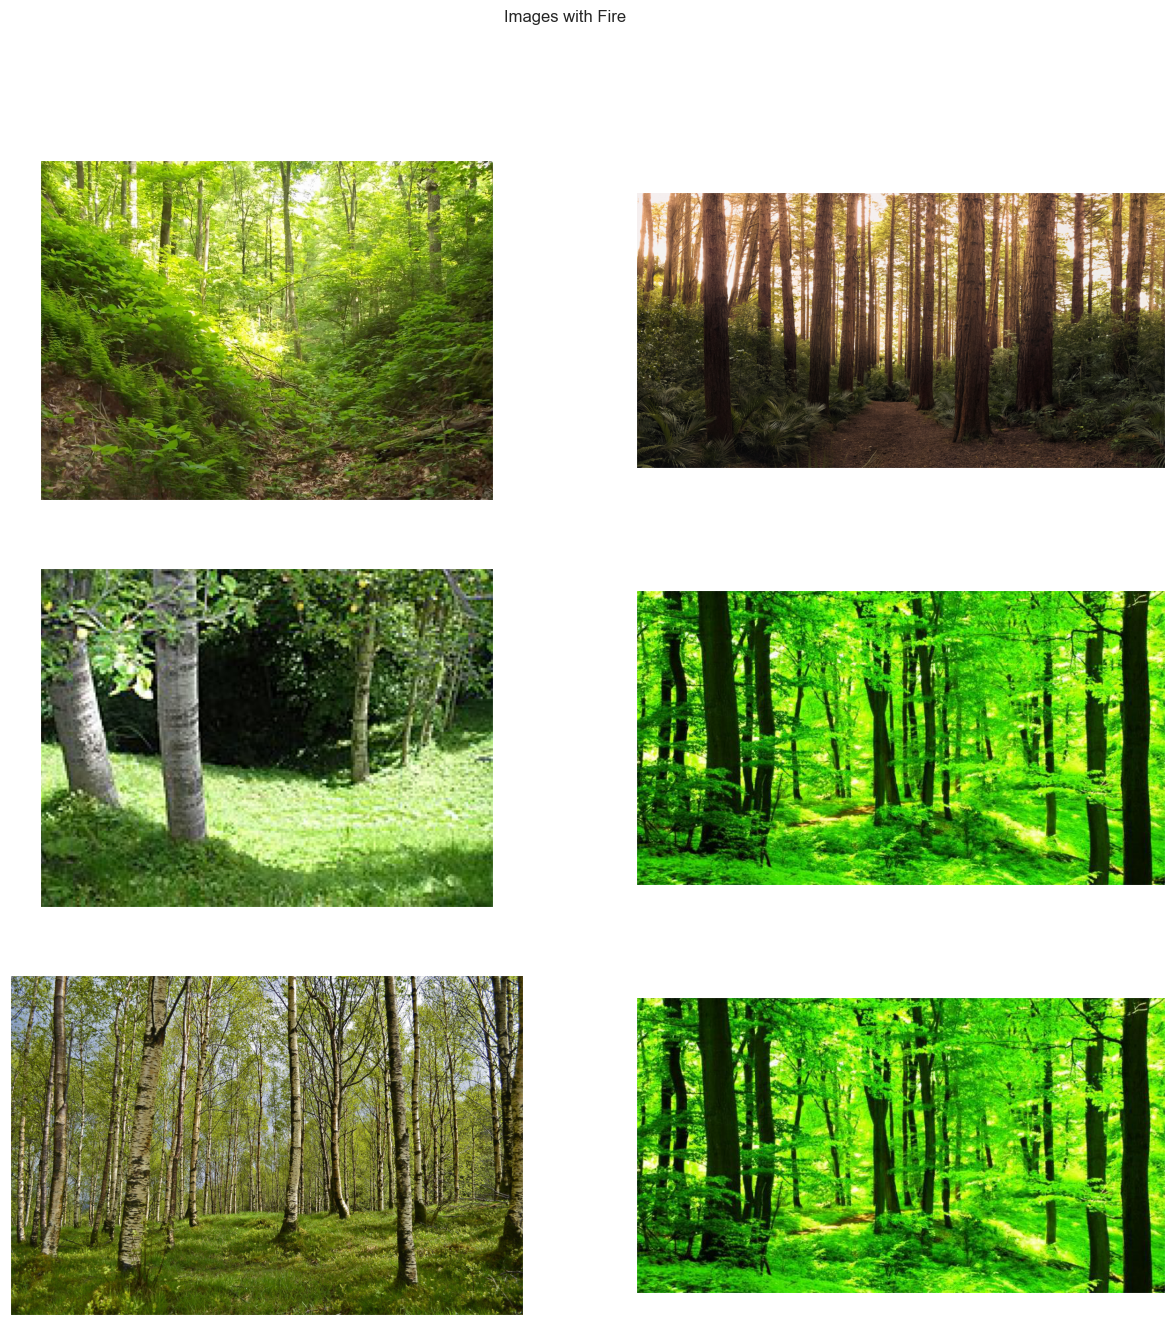

In [8]:
#as the above this selects images with the label "non-fire" and displays them in a subplot
label = 'non-fire' #label for images without fire
data = df[df['labels'] == label]
sns.set_style('dark')


pics = 6 #set the number of pics
fig,ax = plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//2)*2):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

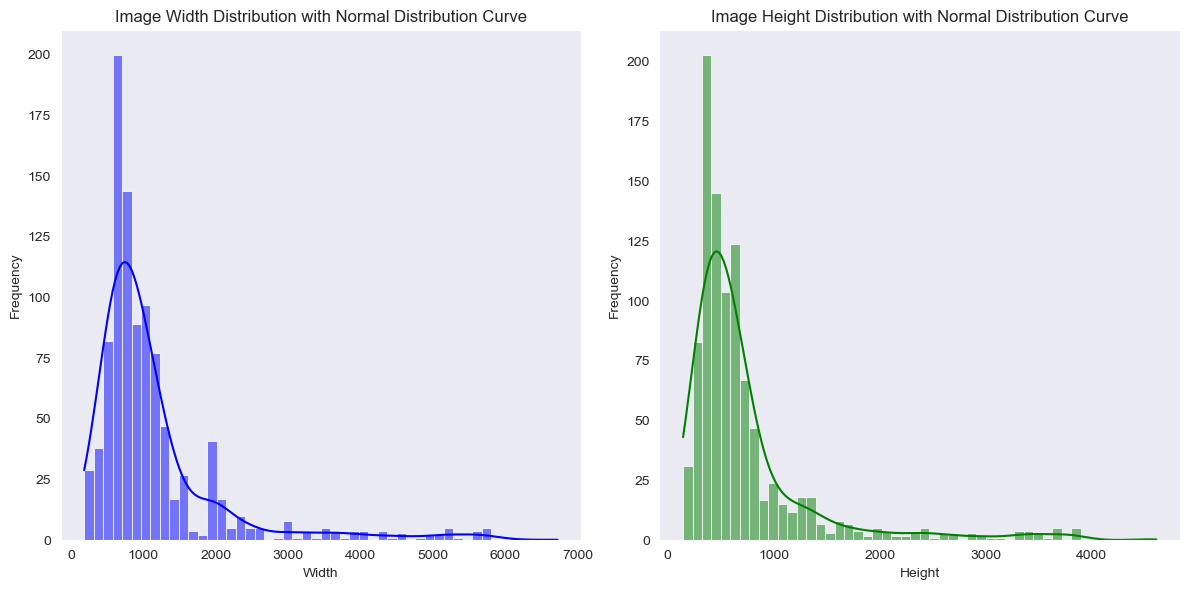

In [9]:
#a subplot with two histograms showing the distribution of image widths and heights and overlays a normal distribution curve
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='width', bins=50, color='blue', kde=True)
plt.title('Image Width Distribution with Normal Distribution Curve')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='height', bins=50, color='green', kde=True)
plt.title('Image Height Distribution with Normal Distribution Curve')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

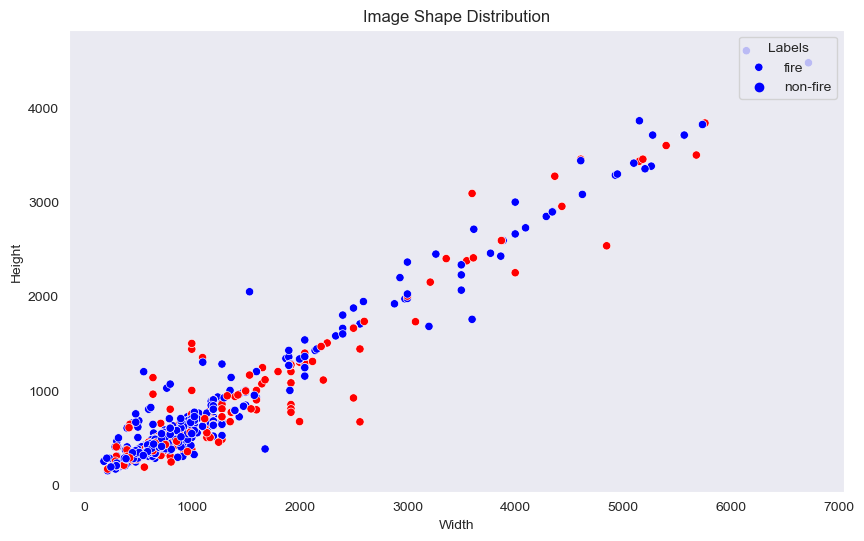

In [10]:
#a scatterplot to visualize the distribution of image shapes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='width', y='height', hue='labels', palette=['blue', 'red'])
plt.title('Image Shape Distribution')
plt.xlabel('Width')
plt.ylabel('Height')
plt.legend(title='Labels', loc='upper right', labels=['fire', 'non-fire'])
plt.show()

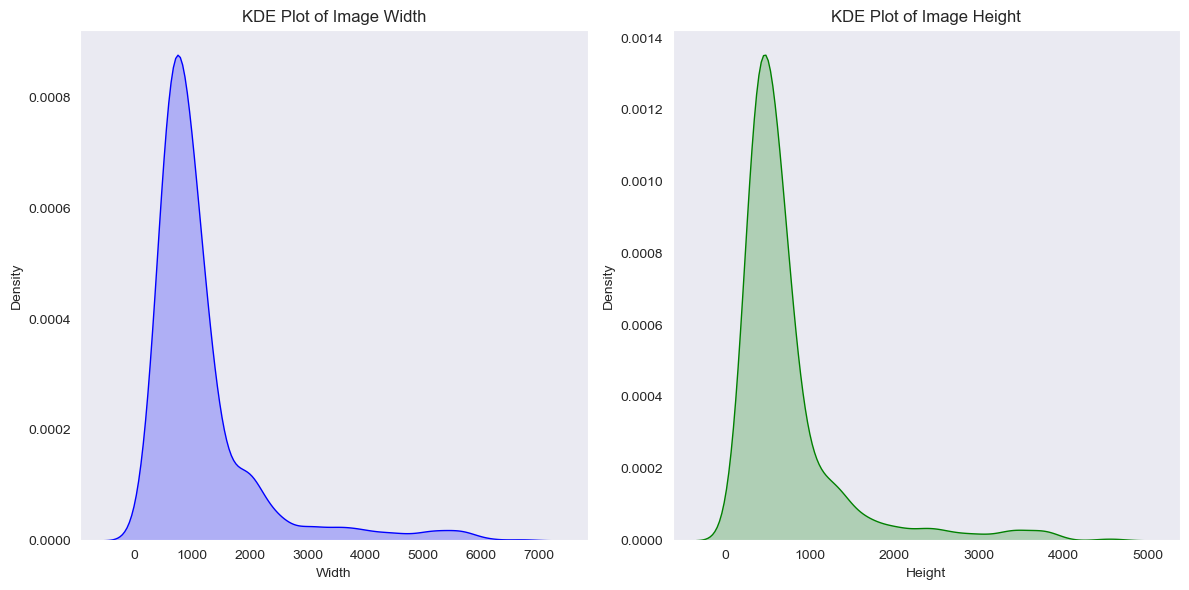

In [11]:
#KDE (Kernel Density Estimation) plots for image width and height
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(data=df, x='width', fill=True, color='blue')
plt.title('KDE Plot of Image Width')
plt.xlabel('Width')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.kdeplot(data=df, x='height', fill=True, color='green')
plt.title('KDE Plot of Image Height')
plt.xlabel('Height')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

In [1]:
#box plots to visualize the distribution of image widths and heights
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='width', x='labels', palette=['blue', 'red'])
plt.title('Box Plot of Image Width')
plt.xlabel('Labels')
plt.ylabel('Width')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, y='height', x='labels', palette=['blue', 'red'])
plt.title('Box Plot of Image Height')
plt.xlabel('Labels')
plt.ylabel('Height')

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['path'], df['labels'], test_size=0.2, random_state=42)

# Encode the labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(244, 244, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Preprocess the images and generate augmented data
image_generator = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = image_generator.flow_from_dataframe(dataframe=pd.DataFrame({'path': X_train, 'labels': y_train}),
                                                      x_col='path', y_col='labels', target_size=(244, 244),
                                                      class_mode='raw', batch_size=250)
test_generator = image_generator.flow_from_dataframe(dataframe=pd.DataFrame({'path': X_test, 'labels': y_test}),
                                                     x_col='path', y_col='labels', target_size=(244, 244),
                                                     class_mode='raw', batch_size=250)

# Train the model
model.fit(train_generator, validation_data=test_generator, epochs=4)

# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

Found 799 validated image filenames.
Found 200 validated image filenames.
Epoch 1/4


ResourceExhaustedError: Graph execution error:

Detected at node gradient_tape/sequential/max_pooling2d/MaxPool/MaxPoolGrad defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "S:\Anaconda\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "S:\Anaconda\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "S:\Anaconda\Lib\site-packages\ipykernel\kernelapp.py", line 711, in start

  File "S:\Anaconda\Lib\site-packages\tornado\platform\asyncio.py", line 215, in start

  File "S:\Anaconda\Lib\asyncio\base_events.py", line 607, in run_forever

  File "S:\Anaconda\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "S:\Anaconda\Lib\asyncio\events.py", line 80, in _run

  File "S:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue

  File "S:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one

  File "S:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell

  File "S:\Anaconda\Lib\site-packages\ipykernel\kernelbase.py", line 729, in execute_request

  File "S:\Anaconda\Lib\site-packages\ipykernel\ipkernel.py", line 411, in do_execute

  File "S:\Anaconda\Lib\site-packages\ipykernel\zmqshell.py", line 531, in run_cell

  File "S:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3006, in run_cell

  File "S:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3061, in _run_cell

  File "S:\Anaconda\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "S:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3266, in run_cell_async

  File "S:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3445, in run_ast_nodes

  File "S:\Anaconda\Lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code

  File "C:\Users\Abdo Tarek\AppData\Local\Temp\ipykernel_2636\1771305508.py", line 30, in <module>

  File "S:\Anaconda\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "S:\Anaconda\Lib\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "S:\Anaconda\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "S:\Anaconda\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "S:\Anaconda\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "S:\Anaconda\Lib\site-packages\keras\src\engine\training.py", line 1130, in train_step

  File "S:\Anaconda\Lib\site-packages\keras\src\optimizers\optimizer.py", line 543, in minimize

  File "S:\Anaconda\Lib\site-packages\keras\src\optimizers\optimizer.py", line 276, in compute_gradients

OOM when allocating tensor with shape[250,242,242,32] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node gradient_tape/sequential/max_pooling2d/MaxPool/MaxPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_1111]

In [ ]:
model.save('First Fire.h5')

In [ ]:
input_image_path = input('Please enter the path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
input_image_resize = cv2.resize(input_image,(244,244))
input_image_scaled = input_image_resize/255
image_reshaped = np.reshape(input_image_scaled, [1,244,244,3])
input_prediction = model.predict(image_reshaped)
print(input_prediction)
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)
if input_pred_label == 0:
    print('There is no Fire Here!')
else:
    print('There is Fire Here!')